# Import Modules

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# Data Understanding

In [47]:
# Read CSV
df = pd.read_csv('src/loandata.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2788\3436894370.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('src/loandata.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read Headers
print(df.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [4]:
# Read Specific Column
print(df[['member_id', 'title']])

        member_id                    title
0         1296599                 Computer
1         1314167                     bike
2         1313524     real estate business
3         1277178                 personel
4         1311748                 Personal
...           ...                      ...
466280    1440975       Debt consolidation
466281   11536848       Debt consolidation
466282   11436914       Debt consolidation
466283   11457002  Credit card refinancing
466284   11061576                    Other

[466285 rows x 2 columns]


In [5]:
# Read Each Row

df.loc[df['funded_amnt'] == 10000]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,1065775,1299699,10000,10000,10000.0,36 months,15.27,347.98,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,1069710,1304821,10000,10000,10000.0,36 months,11.71,330.76,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,1069700,1304810,10000,10000,10000.0,36 months,11.71,330.76,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466267,466267,9198304,11060277,10000,10000,10000.0,36 months,12.85,336.22,B,...,NaN,NaN,NaN,NaN,NaN,NaN,25100.0,NaN,NaN,NaN
466270,466270,9685861,11537845,10000,10000,10000.0,36 months,7.90,312.91,A,...,NaN,NaN,NaN,NaN,NaN,NaN,32800.0,NaN,NaN,NaN
466274,466274,9666300,9890240,10000,10000,10000.0,36 months,11.99,332.10,B,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
466278,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN


In [6]:
# Read specific location

print(df.iloc[1,1:5])

id             1077430
member_id      1314167
loan_amnt         2500
funded_amnt       2500
Name: 1, dtype: object


In [7]:
# Describe dataset

df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [10]:
# Making changes to the data

df['total_amnt'] = df.iloc[:, 3:5].sum(axis=1)

df.head()

,Unnamed: 0,id,member_id,loan_amnt,total_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,total_amnt
0,0,1077501,1296599,5000,1306599,5000,4975.0,36 months,10.65,162.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306599
1,1,1077430,1314167,2500,1319167,2500,2500.0,60 months,15.27,59.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1319167
2,2,1077175,1313524,2400,1318324,2400,2400.0,36 months,15.96,84.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1318324
3,3,1076863,1277178,10000,1297178,10000,10000.0,36 months,13.49,339.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297178
4,4,1075358,1311748,3000,1317748,3000,3000.0,60 months,12.69,67.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1317748


In [14]:
# Rearranging columns
df = df.drop(columns = ['total_amnt'])
df['total_amnt'] = df.iloc[:, 3:5].sum(axis=1)
cols = list(df.columns)
df = df[cols[0:5] + [cols[-1]] + cols [5:]]


df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,total_amnt,funded_amnt_inv,term,int_rate,installment,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,total_amnt
0,0,1077501,1296599,5000,5000,10000,4975.0,36 months,10.65,162.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000
1,1,1077430,1314167,2500,2500,5000,2500.0,60 months,15.27,59.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000
2,2,1077175,1313524,2400,2400,4800,2400.0,36 months,15.96,84.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800
3,3,1076863,1277178,10000,10000,20000,10000.0,36 months,13.49,339.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000
4,4,1075358,1311748,3000,3000,6000,3000.0,60 months,12.69,67.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000


In [15]:
# Filtering data
df[(df.funded_amnt == 5000) | (df.term == '36 months')]

# Term percentage of funded amount == 5000
df[df.funded_amnt == 5000].term.value_counts(normalize=True)

# Reset index
df = df.reset_index(drop = True)

In [16]:
# Aggregate Statistics
# df['term'] = df['term'].astype(str) + ' months'
df.iloc[:,2:10].groupby(['term']).mean().sort_values('loan_amnt', ascending=False)

,member_id,loan_amnt,funded_amnt,total_amnt,funded_amnt_inv,int_rate,installment
term,,,,,,,
60 months,1.611264e+07,19869.225914,19808.653337,39677.879251,19770.079547,16.964663,495.135072
36 months,1.402237e+07,12209.018044,12196.868647,24405.886691,12115.664733,12.638610,408.109953


# Data Preprocessing

In [17]:
# Changing term to integer
df.term = df.term.str.extract('(\d+)').astype(int)

In [18]:
# Select only useful features

selected_columns = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status',
    'open_acc','pub_rec','revol_bal','revol_util','total_acc', 'dti', 'loan_status'
]

df = df.loc[:, selected_columns]

In [19]:
# Preprocessing data

le = preprocessing.LabelEncoder()

emp_length_to_int={'< 1 year':0,
                      '1 year':1,
                     '2 years':2,
                     '3 years':3,
                     '4 years':4,
                     '5 years':5,
                     '6 years':6,
                     '7 years':7,
                     '8 years':8,
                     '9 years':9,
                     '10+ years':10}
df['emp_length'] = df['emp_length'].map(emp_length_to_int)

df['loan_status'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

df['home_ownership'] = le.fit_transform(df['home_ownership'])

df['verification_status'] = df['verification_status'].map({'Not Verified': 0, 'Verified': 1, 'Source Verified': 2 })

df = df.dropna(subset=['loan_status'])
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,open_acc,pub_rec,revol_bal,revol_util,total_acc,dti,loan_status
0,5000,36,10.65,2,10.0,5,24000.0,1,3.0,0.0,13648,83.7,9.0,27.65,0.0
1,2500,60,15.27,3,0.0,5,30000.0,2,3.0,0.0,1687,9.4,4.0,1.00,1.0
2,2400,36,15.96,3,10.0,5,12252.0,0,2.0,0.0,2956,98.5,10.0,8.72,0.0
3,10000,36,13.49,3,10.0,5,49200.0,2,10.0,0.0,5598,21.0,37.0,20.00,0.0
5,5000,36,7.90,1,3.0,5,36000.0,2,9.0,0.0,7963,28.3,12.0,11.20,0.0


In [117]:
# Reset index

df = df.reset_index(drop = True)
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,open_acc,pub_rec,revol_bal,revol_util,total_acc,dti,loan_status
0,5000,36,10.65,2,10.0,5,24000.0,1,3.0,0.0,13648,83.7,9.0,27.65,0.0
1,2500,60,15.27,3,0.0,5,30000.0,2,3.0,0.0,1687,9.4,4.0,1.00,1.0
2,2400,36,15.96,3,10.0,5,12252.0,0,2.0,0.0,2956,98.5,10.0,8.72,0.0
3,10000,36,13.49,3,10.0,5,49200.0,2,10.0,0.0,5598,21.0,37.0,20.00,0.0
4,5000,36,7.90,1,3.0,5,36000.0,2,9.0,0.0,7963,28.3,12.0,11.20,0.0


In [20]:
# Remove null rows

df = df.dropna()
print(df.isnull().sum())

loan_amnt              0
term                   0
int_rate               0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
dti                    0
loan_status            0
dtype: int64


# Machine Learning

In [21]:
# Split training data into training and test set

X = df.drop('loan_status', axis=1).values
Y = df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(174690, 14) (43673, 14)


In [32]:
# Machine Learning using Logistic Regression (Classification)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Metrics

In [33]:
# Print Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("\n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8181027179264077
Precision: 0.25
Recall: 0.002276176024279211
F1 Score: 0.004511278195488722



              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     35765
         1.0       0.25      0.00      0.00      7908

    accuracy                           0.82     43673
   macro avg       0.53      0.50      0.45     43673
weighted avg       0.72      0.82      0.74     43673



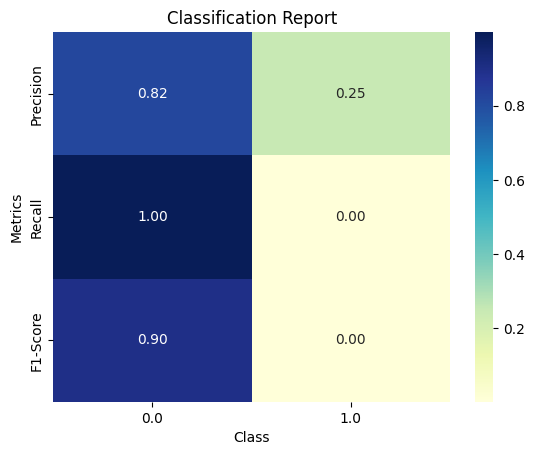

In [34]:
# Compute the classification report
report = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report.keys())[:-3]  # Exclude the 'accuracy', 'macro avg', and 'weighted avg' keys

# Extract precision, recall, and f1-score values for each class
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a matrix of the metrics values
metrics_matrix = np.array([precision, recall, f1_score])

# Create a heatmap using seaborn
sns.heatmap(metrics_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=['Precision', 'Recall', 'F1-Score'])
plt.xlabel('Class')
plt.ylabel('Metrics')
plt.title('Classification Report')
plt.show()


In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[35711    54]
 [ 7890    18]]


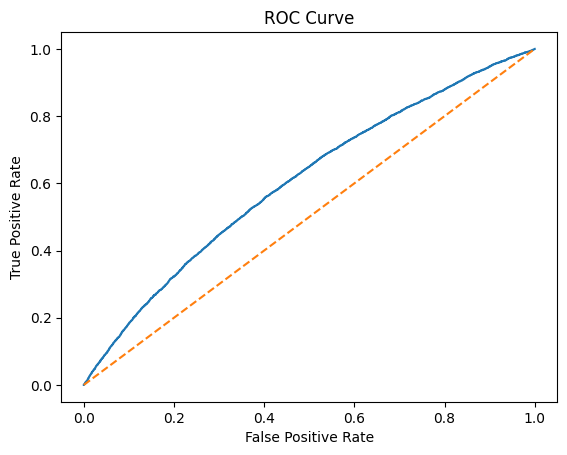

In [44]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [46]:
average_precision = metrics.average_precision_score(y_test, y_pred_proba)
print("Average Precision:", average_precision)

Average Precision: 0.24331317258044582


# Thank You
### This code is written by Mushab Tinumbang